<a href="https://colab.research.google.com/github/Mahsabeigi33/predict_stock_price/blob/main/stock_market_prediction_using_cnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using CNN-LSTM model
This project is about analysis of Stock Market and providing predictions to the stockholders. For this, we used CNN-LSTM approach to create a blank model, then use it to train on stock market data. Further implementation is discussed below...

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


# Data Preprocessing and Analysis

In [30]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
from pandas_datareader import data as pdr
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [31]:
data = pdr.get_data_yahoo('BTC-USD', start='2012-01-01', end='2023-05-29')


[*********************100%***********************]  1 of 1 completed


In [32]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-24,27224.603516,27224.603516,26106.576172,26334.818359,26334.818359,16299104428
2023-05-25,26329.460938,26591.519531,25890.593750,26476.207031,26476.207031,13851122697
2023-05-26,26474.181641,26916.669922,26343.949219,26719.291016,26719.291016,12711619225


In [33]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3176 entries, 2014-09-17 to 2023-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3176 non-null   float64
 1   High       3176 non-null   float64
 2   Low        3176 non-null   float64
 3   Close      3176 non-null   float64
 4   Adj Close  3176 non-null   float64
 5   Volume     3176 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 173.7 KB


In [34]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3176.000000,3176.000000,3176.000000,3176.000000,3176.000000,3.176000e+03
mean,13418.753963,13749.692393,13054.949531,13426.050820,13426.050820,1.659267e+10
std,16029.924018,16434.274680,15566.423950,16027.106774,16027.106774,1.963735e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,740.639267,747.850510,732.666245,740.939987,740.939987,1.218452e+08
50%,7495.126465,7657.658203,7332.165039,7502.879395,7502.879395,9.722978e+09
75%,19446.553711,19973.164062,19117.605469,19459.169434,19459.169434,2.777330e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [36]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Filling null columns with mean values....

In [42]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,13425.232063,13416.880694,13407.35948,0.002020
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,13425.232063,13416.880694,13407.35948,-0.071926
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,13425.232063,13416.880694,13407.35948,-0.069843
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,13425.232063,13416.880694,13407.35948,0.035735
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,13425.232063,13416.880694,13407.35948,-0.024659


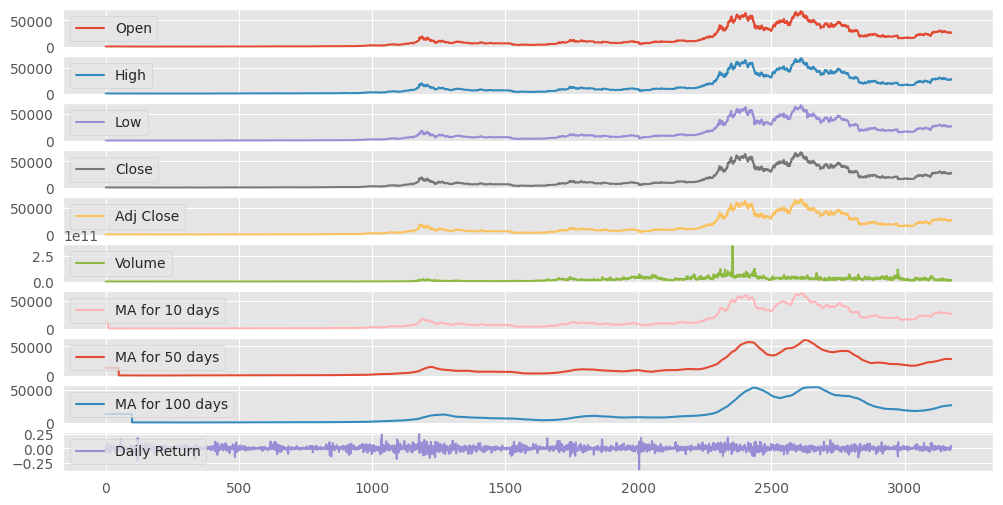

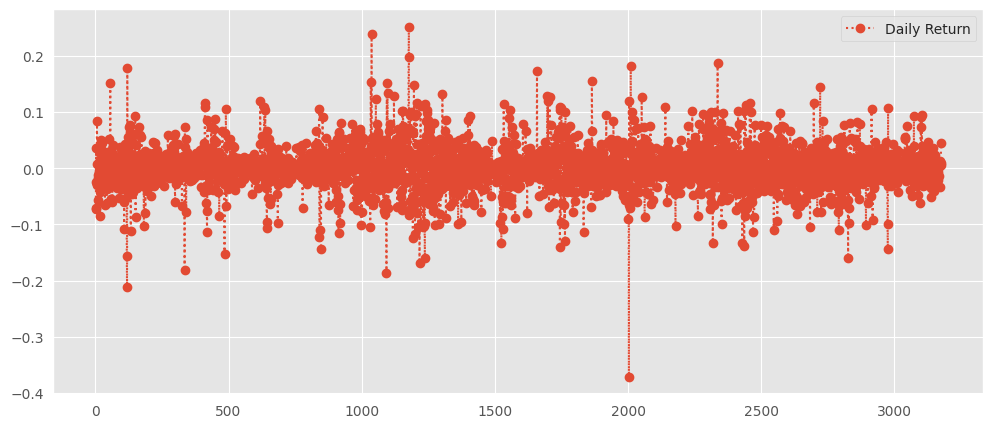

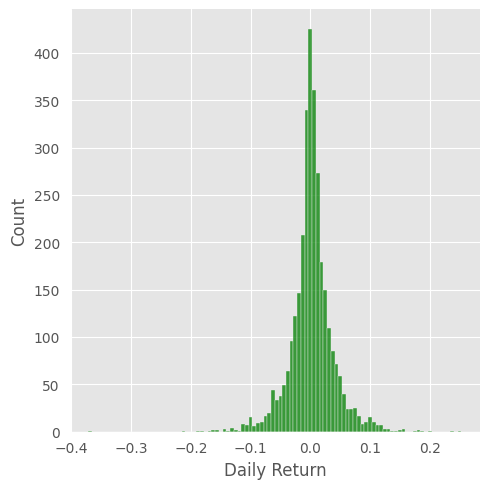

In [43]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [38]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN,-0.024659


In [44]:
pd.DataFrame(data['Open'])

,Open
0,465.864014
1,456.859985
2,424.102997
3,394.673004
4,408.084991
...,...
3171,27224.603516
3172,26329.460938
3173,26474.181641
3174,26720.181641


In [41]:
#date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

NameError: ignored

After that, we'll visualize the data for understanding, this is shown below...

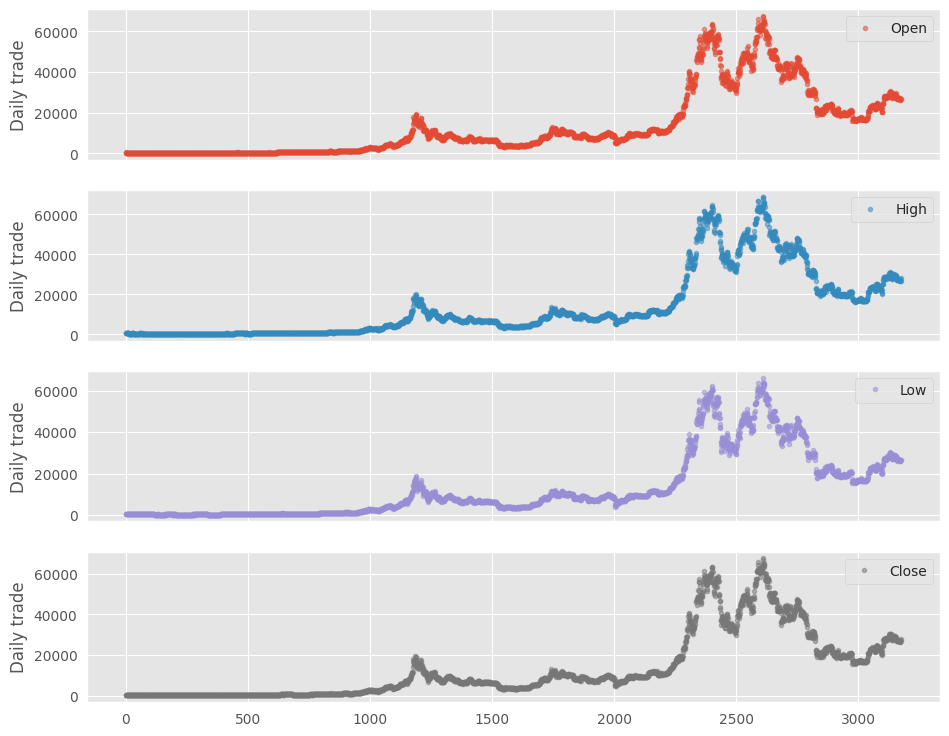

In [45]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Then we'd print the data after making changes and dropping null data

              Open          High           Low         Close     Adj Close  \
0       465.864014    468.174011    452.421997    457.334015    457.334015   
1       456.859985    456.859985    413.104004    424.440002    424.440002   
2       424.102997    427.834991    384.532013    394.795990    394.795990   
3       394.673004    423.295990    389.882996    408.903992    408.903992   
4       408.084991    412.425995    393.181000    398.821014    398.821014   
...            ...           ...           ...           ...           ...   
3171  27224.603516  27224.603516  26106.576172  26334.818359  26334.818359   
3172  26329.460938  26591.519531  25890.593750  26476.207031  26476.207031   
3173  26474.181641  26916.669922  26343.949219  26719.291016  26719.291016   
3174  26720.181641  26888.882812  26621.140625  26868.353516  26868.353516   
3175  26871.158203  28193.449219  26802.751953  28085.646484  28085.646484   

           Volume  MA for 10 days  MA for 50 days  MA for 100 d

,count,mean,std,min,25%,50%,75%,max
Open,3176.0,1.341875e+04,1.602992e+04,1.768970e+02,7.406393e+02,7.495126e+03,1.944655e+04,6.754973e+04
High,3176.0,1.374969e+04,1.643427e+04,2.117310e+02,7.478505e+02,7.657658e+03,1.997316e+04,6.878962e+04
Low,3176.0,1.305495e+04,1.556642e+04,1.715100e+02,7.326662e+02,7.332165e+03,1.911761e+04,6.638206e+04
Close,3176.0,1.342605e+04,1.602711e+04,1.781030e+02,7.409400e+02,7.502879e+03,1.945917e+04,6.756683e+04
Adj Close,3176.0,1.342605e+04,1.602711e+04,1.781030e+02,7.409400e+02,7.502879e+03,1.945917e+04,6.756683e+04
Volume,3176.0,1.659267e+10,1.963735e+10,5.914570e+06,1.218452e+08,9.722978e+09,2.777330e+10,3.509679e+11
MA for 10 days,3167.0,1.342523e+04,1.600206e+04,2.117983e+02,7.402325e+02,7.469904e+03,1.959795e+04,6.469885e+04
MA for 50 days,3127.0,1.341688e+04,1.588275e+04,2.322616e+02,7.655441e+02,7.733579e+03,1.963277e+04,6.080177e+04
MA for 100 days,3077.0,1.340736e+04,1.569020e+04,2.378734e+02,8.164294e+02,8.000196e+03,1.958796e+04,5.500548e+04
Daily Return,3175.0,2.020386e-03,3.784484e-02,-3.716954e-01,-1.338385e-02,1.620550e-03,1.768531e-02,2.524717e-01


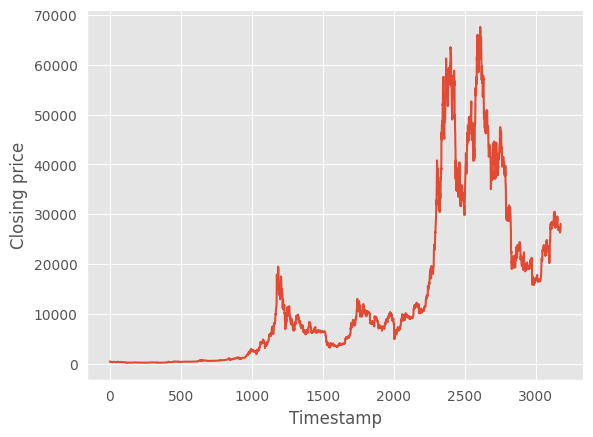

In [46]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

In [47]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2459
615


# Training part

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [48]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
62/62 [==============================] - 17s 95ms/step - loss: 0.1407 - mse: 0.1407 - mae: 0.2418 - val_loss: 0.0555 - val_mse: 0.0555 - val_mae: 0.1549
Epoch 2/40
62/62 [==============================] - 3s 43ms/step - loss: 0.0585 - mse: 0.0585 - mae: 0.1594 - val_loss: 0.0413 - val_mse: 0.0413 - val_mae: 0.1358
Epoch 3/40
62/62 [==============================] - 3s 45ms/step - loss: 0.0425 - mse: 0.0425 - mae: 0.1372 - val_loss: 0.0372 - val_mse: 0.0372 - val_mae: 0.1318
Epoch 4/40
62/62 [==============================] - 3s 45ms/step - loss: 0.0410 - mse: 0.0410 - mae: 0.1328 - val_loss: 0.0303 - val_mse: 0.0303 - val_mae: 0.1137
Epoch 5/40
62/62 [==============================] - 4s 58ms/step - loss: 0.0384 - mse: 0.0384 - mae: 0.1275 - val_loss: 0.0295 - val_mse: 0.0295 - val_mae: 0.1119
Epoch 6/40
62/62 [==============================] - 3s 49ms/step - loss: 0.0350 - mse: 0.0350 - mae: 0.1228 - val_loss: 0.0316 - val_mse: 0.0316 - val_mae: 0.1127
Epoch 7/40
62/62 [===

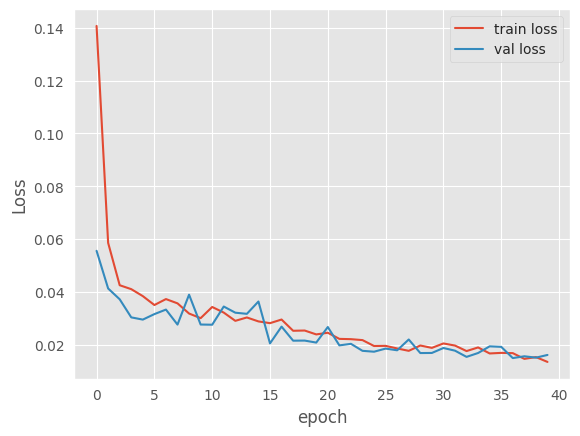

In [49]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

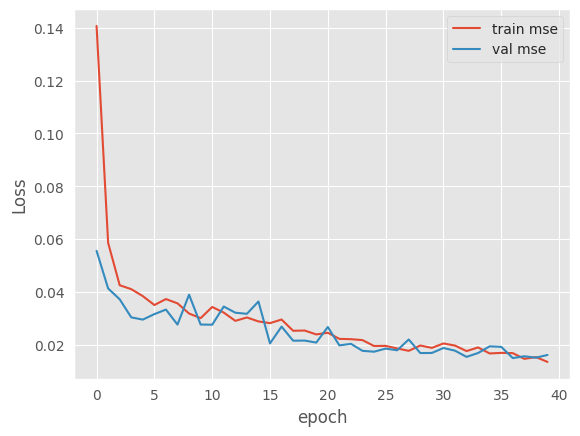

In [50]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

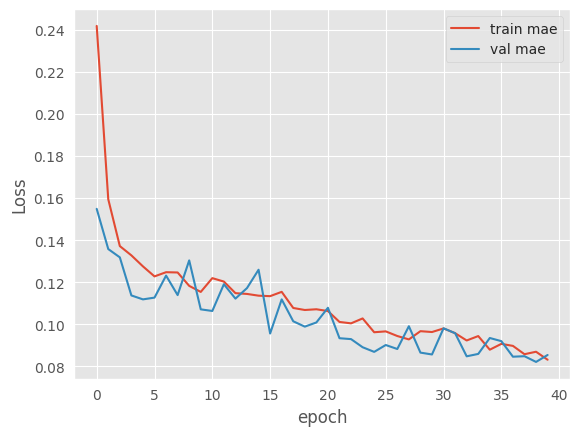

In [51]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

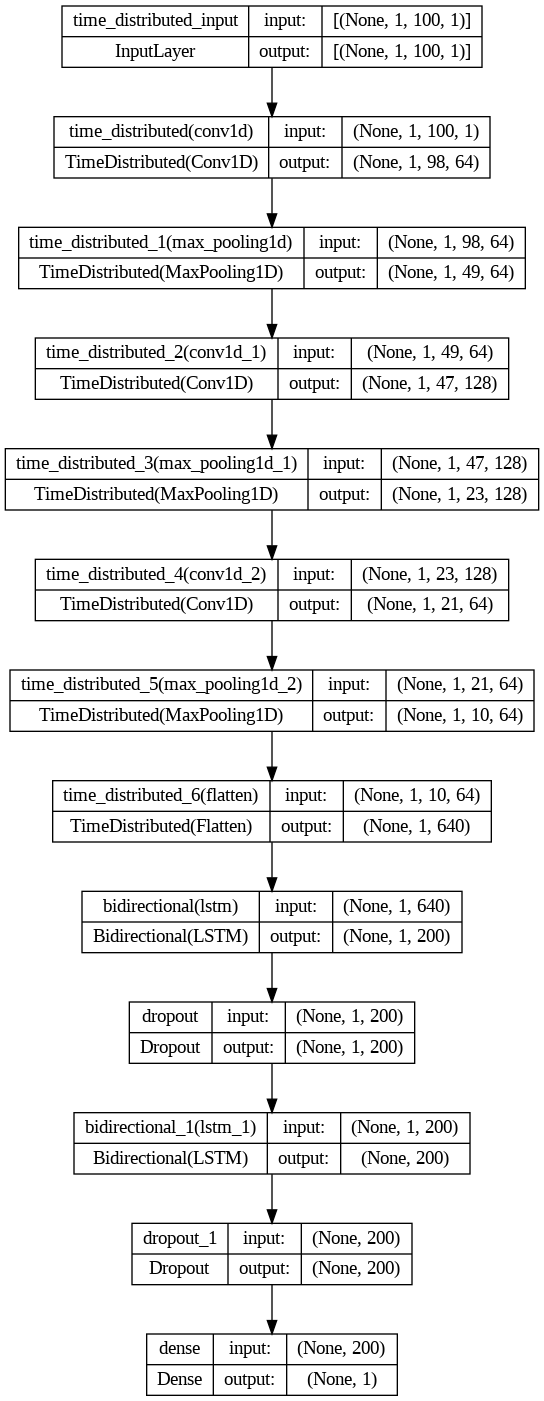

In [52]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [53]:
model.evaluate(test_X, test_Y)

20/20 [==============================] - 0s 11ms/step - loss: 0.0161 - mse: 0.0161 - mae: 0.0855


[0.01608709804713726, 0.01608709804713726, 0.08546223491430283]

In [54]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.960801
R2 Score: 0.960801
Max Error: 0.786266


20/20 [==============================] - 0s 9ms/step


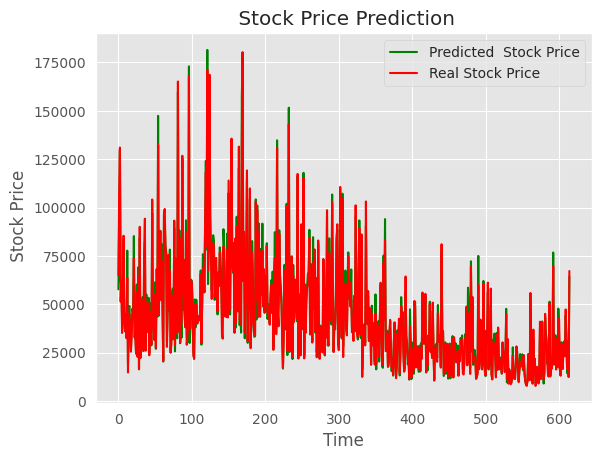

In [55]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing part

In this part, the model is saved and loaded back again. Then, it's made to train again but with different data to check it's loss and prediction

In [56]:
# First we need to save a model
model.save("model.h5")

In [57]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [58]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [61]:
# For data preprocessing and analysis part
#data2 = pd.read_csv('../input/price-volume-data-for-all-us-stocks-etfs/Stocks/aaoi.us.txt')
#data2 = pd.read_csv('../input/nifty50-stock-market-data/SBIN.csv')
#data2 = pd.read_csv('../input/stock-market-data/stock_market_data/nasdaq/csv/ACTG.csv')
data2 = pdr.get_data_yahoo('BTC-USD', start='2012-01-01', end='2023-05-29')

#data2 = pd.read_csv('./data.csv')
# Any CSV or TXT file can be added here....
data2.dropna(inplace=True)
data2.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [65]:
data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
#df2 =data2.drop('Date', axis=1)

print(data2)

              Open          High           Low         Close     Adj Close  \
0       465.864014    468.174011    452.421997    457.334015    457.334015   
1       456.859985    456.859985    413.104004    424.440002    424.440002   
2       424.102997    427.834991    384.532013    394.795990    394.795990   
3       394.673004    423.295990    389.882996    408.903992    408.903992   
4       408.084991    412.425995    393.181000    398.821014    398.821014   
...            ...           ...           ...           ...           ...   
3171  27224.603516  27224.603516  26106.576172  26334.818359  26334.818359   
3172  26329.460938  26591.519531  25890.593750  26476.207031  26476.207031   
3173  26474.181641  26916.669922  26343.949219  26719.291016  26719.291016   
3174  26720.181641  26888.882812  26621.140625  26868.353516  26868.353516   
3175  26871.158203  28193.449219  26802.751953  28085.646484  28085.646484   

           Volume  
0        21056800  
1        34483200  
2  

In [66]:
df2=data2.copy()
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2459
615


In [67]:
model.evaluate(test_X, test_Y)

20/20 [==============================] - 0s 11ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0572


[0.005762976594269276, 0.005762976594269276, 0.057215768843889236]

20/20 [==============================] - 0s 9ms/step


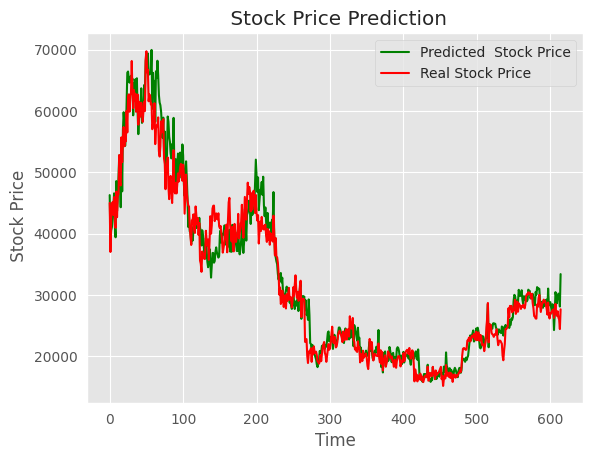

In [68]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [69]:
# Converting model from HDF5 format to TFJS format...
!pip install tensorflowjs[wizard]
# Need to be done on a CLI and not in notebook
!tensorflowjs_converter --input_format=keras /kaggle/working/model.h5 /kaggle/working/model-tjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.3/248.3 kB 24.5 MB/s eta 0:00:00
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-py3-none-any.whl size=32848 sha256=45a7d2ca2228c2e60beff2b25d41455d9d6c8ba6b9e3fc3544a4653dd1f08535
  Stored in directory: /root/.cache/pip/wheels/2c/e4/8e/81d8a92fe3a12404e9c6d991c567b7ad7c9ee09d542f7c1980
Successfully built PyInquirer
  Attempting uninstall: prompt_toolkit
    Found existing installation: prompt-toolkit 3.0.38
    Uninstalling prompt-toolkit-3.0.38:
      Successfully uninstall

2023-06-10 07:53:00.959385: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 827, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 831, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 817, in convert
    _dispatch_converter(input_format, output_format, args, quantization_dtype_map,
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 500, in _dispatch_converter
    dispatch_keras_h5_to_tfjs_layers_model_conversion(
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 76, in di

# EDA

This section is exploratory data analysis on the dataset collected. This is just for analysing the data...

In [70]:
dataX = pdr.get_data_yahoo('BTC-USD', start='2012-01-01', end='2023-05-29')
dataY= dataX.copy()


#dataX = pd.read_csv('./data.csv')
#dataY = pd.read_csv('./data.csv')
dataX.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3176 entries, 2014-09-17 to 2023-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3176 non-null   float64
 1   High       3176 non-null   float64
 2   Low        3176 non-null   float64
 3   Close      3176 non-null   float64
 4   Adj Close  3176 non-null   float64
 5   Volume     3176 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 173.7 KB


In [71]:
dataX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
start_date = '2020-01-01'
end_date = '2023-05-29'

start = '2018-01-01'
end = '2020-01-01'

fill = (dataX['Date']>=start_date) & (dataX['Date']<=end_date)
dataX = dataX.loc[fill]
dataX

In [ ]:
fill2 = (dataY['date']>=start) & (dataY['date']<=end)
dataY = dataY.loc[fill2]
dataY

,Unnamed: 0,open,high,low,close,volume,date
501,501,132.53,134.12,132.40,134.04,3777504,2019-12-31
502,502,135.20,135.30,132.50,132.81,4118929,2019-12-30
503,503,135.00,135.75,134.87,135.27,2752185,2019-12-27
504,504,134.98,135.31,134.65,134.91,2129654,2019-12-26
505,505,135.61,135.62,134.61,134.98,1202087,2019-12-24
...,...,...,...,...,...,...,...
999,999,162.66,163.91,161.70,163.47,5101023,2018-01-08
1000,1000,162.44,162.90,161.10,162.49,5162075,2018-01-05
1001,1001,159.65,162.32,159.37,161.70,7363843,2018-01-04
1002,1002,157.34,159.81,156.33,158.49,9439063,2018-01-03


In [74]:
dataX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3176.000000,3176.000000,3176.000000,3176.000000,3176.000000,3.176000e+03
mean,13418.753963,13749.692393,13054.949531,13426.050820,13426.050820,1.659267e+10
std,16029.924018,16434.274680,15566.423950,16027.106774,16027.106774,1.963735e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,740.639267,747.850510,732.666245,740.939987,740.939987,1.218452e+08
50%,7495.126465,7657.658203,7332.165039,7502.879395,7502.879395,9.722978e+09
75%,19446.553711,19973.164062,19117.605469,19459.169434,19459.169434,2.777330e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
dataY.describe()

,Unnamed: 0,open,high,low,close,volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,752.000000,140.470239,141.512740,139.348929,140.416143,4.590926e+06
std,145.347859,11.156349,11.144803,11.149435,11.121441,2.880224e+06
min,501.000000,108.000000,111.000000,105.940000,107.570000,1.202087e+06
25%,626.500000,134.485000,135.305000,133.570000,134.360000,3.067226e+06
50%,752.000000,140.720000,141.780000,139.790000,140.850000,3.783614e+06
75%,877.500000,146.635000,147.300000,145.540000,146.385000,5.033500e+06
max,1003.000000,170.000000,171.130000,168.150000,169.120000,2.206367e+07


<ipython-input-76-bbe296dc1105>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(dataX['Close'])
<ipython-input-76-bbe296dc1105>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot2 = sns.distplot(dataY['Close'])


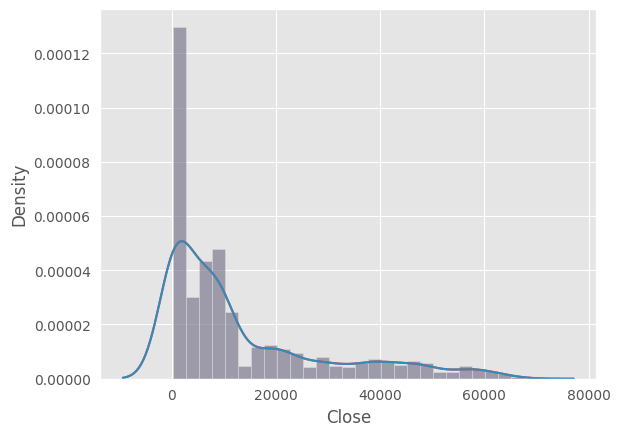

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

sns_plot = sns.distplot(dataX['Close'])
sns_plot2 = sns.distplot(dataY['Close'])

<ipython-input-79-5df29a997472>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataX['Close'], ax = ax[0,1])
<ipython-input-79-5df29a997472>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataX['Open'], ax = ax[1,1])
<ipython-input-79-5df29a997472>:7: UserWarning: 

`distplot` is a deprecate

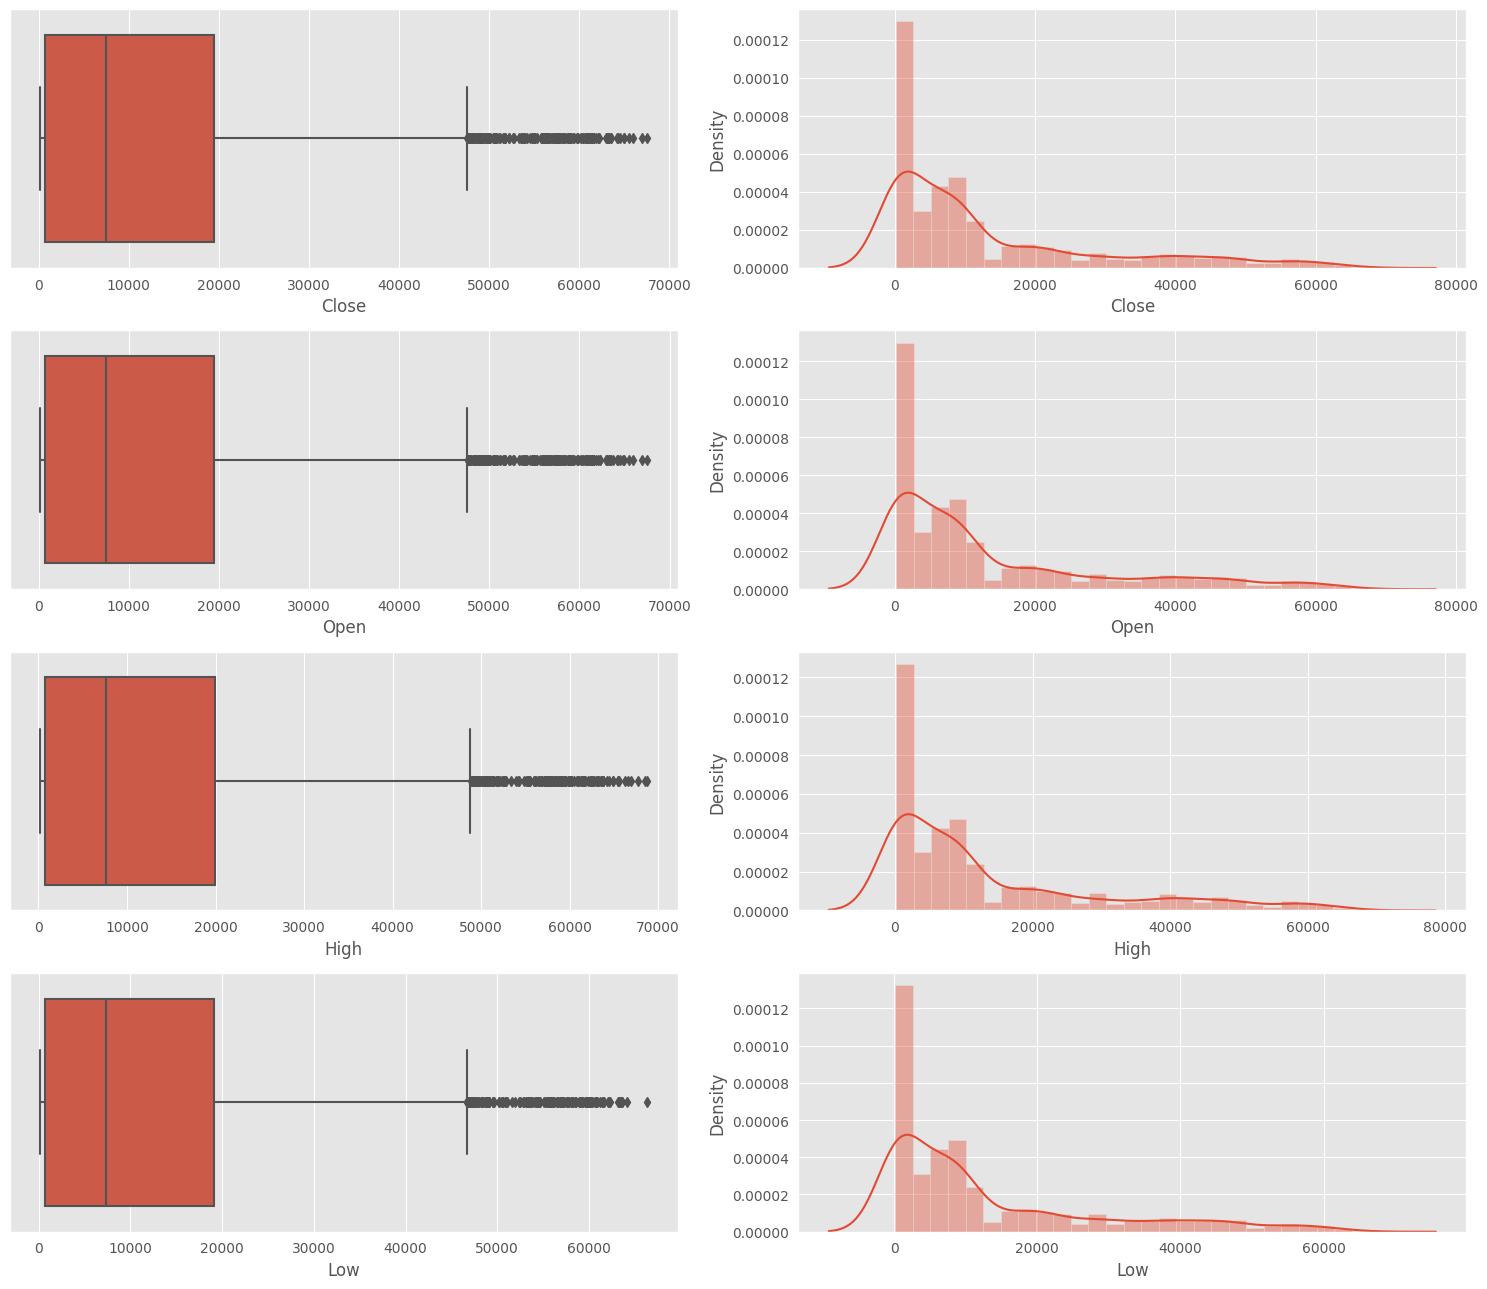

In [79]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataX["Close"], ax = ax[0,0])
sns.distplot(dataX['Close'], ax = ax[0,1])
sns.boxplot(x= dataX["Open"], ax = ax[1,0])
sns.distplot(dataX['Open'], ax = ax[1,1])
sns.boxplot(x= dataX["High"], ax = ax[2,0])
sns.distplot(dataX['High'], ax = ax[2,1])
sns.boxplot(x= dataX["Low"], ax = ax[3,0])
sns.distplot(dataX['Low'], ax = ax[3,1])
plt.tight_layout()